# Accessing Environments across AML Workspaces

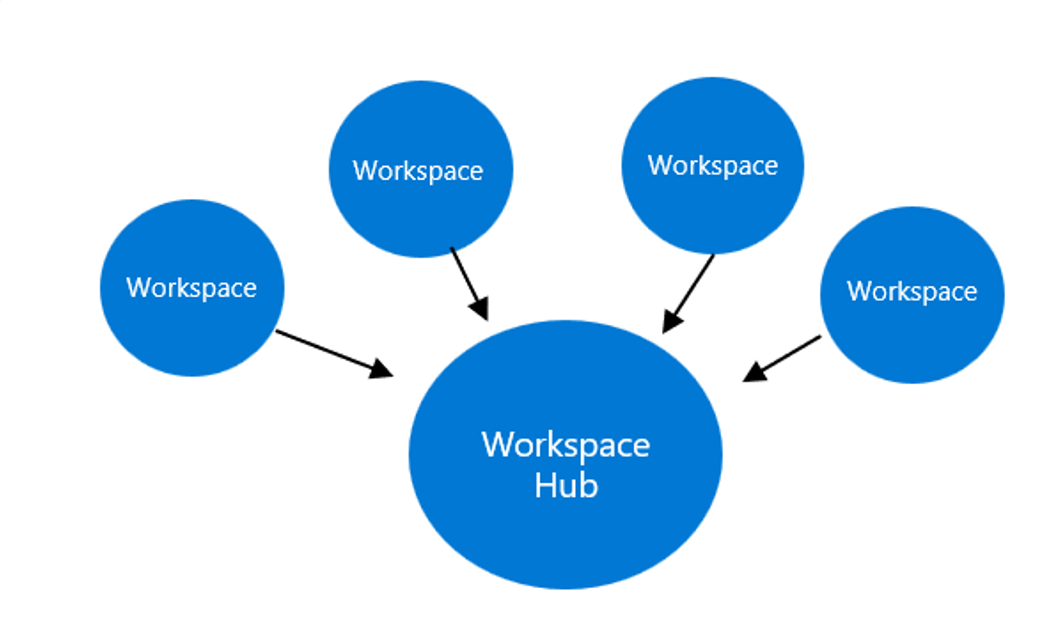

Many real-world Enterprise use cases for the Azure Machine Learning (AML) platform require complex team collaboration and sophisiticated resource management.  AML Workspace Hub is aimed at helping organizations manage cross-Workspace interractions between multiple AML Workspaces under a single subscription.  

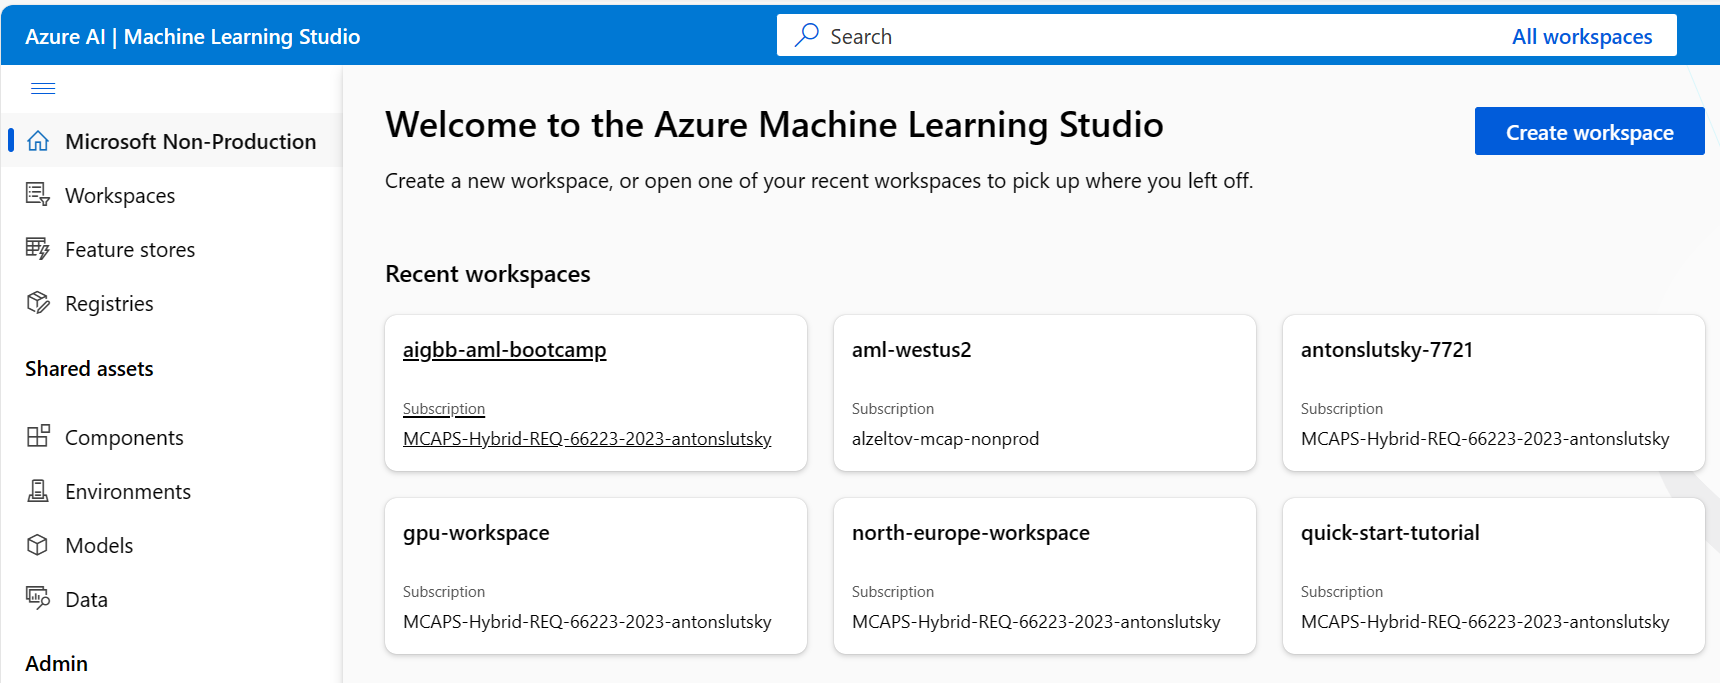

Workspace Hub exposes Subscription-level registries that allow sharing of:
 - Models
 - Components 
 - Environments
across multiple AML Workspaces 

## Create a shared Workspace Hub Registry

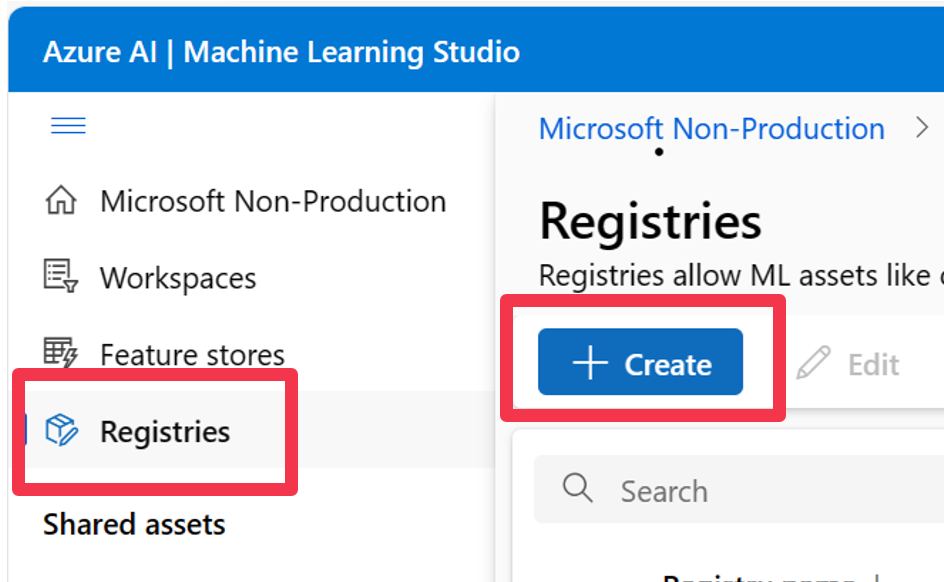

First, create a Workspace Hub Registry called umbrella-aml-registry

## Local Initialization steps

### Configure local environment

In [ ]:
!az configure --defaults workspace=<your workspace name> group=<your resource group name>

## Environment Setup

### Define Environment Configuration

In [ ]:
%%writefile dependencies/conda_small.yml
name: access_environment_aigbb_aml_bootcamp
channels:
  - conda-forge
dependencies:
  - python=3.8
  - pip:
    - inference-schema[numpy-support]==1.3.0
    - azureml-mlflow==1.42.0
    - psutil>=5.8,<5.9
    - tqdm>=4.59,<4.60

### Create an AML environment descriptor

In [ ]:
%%writefile dependencies/access_environment_aigbb_aml_bootcamp_env.yml
$schema: https://azuremlschemas.azureedge.net/latest/environment.schema.json
name: test_private_endpoint_env
image: mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04
conda_file: conda_small.yml
description: Environment created from a Docker image plus Conda environment.

### Register Environment with Workspace Hub Registry

#### List available Workspace Hub environments

In [ ]:
!az ml environment list --registry-name umbrella-aml-registry


#### Create new Environment and Registry with Workspace Hub

In [ ]:

!az ml environment create --file dependencies/access_environment_aigbb_aml_bootcamp_env.yml --registry-name umbrella-aml-registry

#### Validate environment registration with Workspace Hub

In [ ]:
!az ml environment list --registry-name umbrella-aml-registry